In [1]:
from bouquet_of_functions import *

<h2>Table of Contents</h2>
<ul>
    <li><a href="#A-kidney-dataset">A. Kidney Dataset</a></li>
    <li><a href="#B-banknote-dataset">B. Banknote Dataset</a></li>
    <li><a href="#C-discussion">C. Discussion</a></li>
</ul>

# A. Kidney Dataset <a id="A-kidney-dataset"></a>

### I. Preprocessing

Total samples: 400
Number of Positive labels: 250
Number of Negative labels: 150
Number of missing numeric values: 778 (14 columns)
----------------------------------------
Missing values in age: 9/400
Missing values in bp: 12/400
Missing values in sg: 47/400
Missing values in al: 46/400
Missing values in su: 49/400
Missing values in bgr: 44/400
Missing values in bu: 19/400
Missing values in sc: 17/400
Missing values in sod: 87/400
Missing values in pot: 88/400
Missing values in hemo: 52/400
Missing values in pcv: 71/400
Missing values in wc: 106/400
Missing values in rc: 131/400
----------------------------------------
Number of missing categorical values: 234 (10 columns)
----------------------------------------
Missing values in rbc: 152/400
Missing values in pc: 65/400
Missing values in pcc: 4/400
Missing values in ba: 4/400
Missing values in htn: 2/400
Missing values in dm: 2/400
Missing values in cad: 2/400
Missing values in appet: 1/400
Missing values in pe: 1/400
Missing values

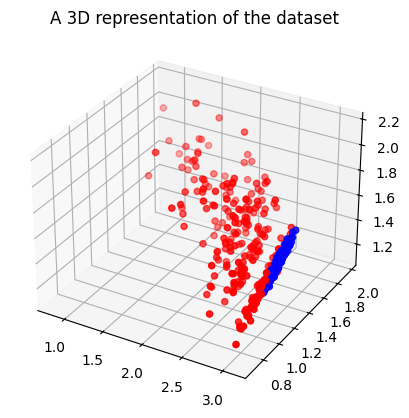

In [2]:
X_kidney, y_kidney = preprocessing("kidney", PCA_dims=17)

There are some columns that have a huge number of missing value, leading to data imbalancing. We can compute the covariance matrix to observe the corelation of data. Then we can remove some insignificant features (feature selection)

### II. Data Loader

In [3]:
X_train_kidney, X_test_kidney, y_train_kidney, y_test_kidney, cv = prepare_data(X_kidney, y_kidney, test_size=0.33)

### III. Training models

#### 1. SVM

In [4]:
svm_model_kidney,_ = train(X_train_kidney, y_train_kidney, cv, 'svm')

Hyperparams SVM to tune:
{'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['poly', 'rbf']}
----------------------------------------
Best params for SVM:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
----------------------------------------
Mean cross-validated score:  1.0
#---Processing Time---#
0.4630110263824463 seconds


#---Classification Report---#
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        47
    Positive       1.00      1.00      1.00        85

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

#---Confusion Matrix---#


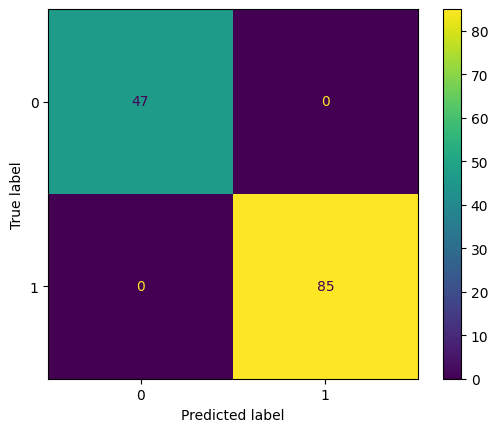

In [5]:
test(X_test_kidney, y_test_kidney, svm_model_kidney)

#### 2. Random Forest

In [6]:
forest_model_kidney,_ = train(X_train_kidney, y_train_kidney, cv, 'forest')

Hyperparams Random Forest to tune:
{'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [5, 10, 20, 50, 100], 'max_features': ['sqrt', 'log2']}
----------------------------------------
Best params for Random Forest:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
----------------------------------------
Mean cross-validated score:  0.9923076923076923
#---Processing Time---#
70.70342898368835 seconds


#---Classification Report---#
              precision    recall  f1-score   support

    Negative       1.00      0.98      0.99        47
    Positive       0.99      1.00      0.99        85

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132

#---Confusion Matrix---#


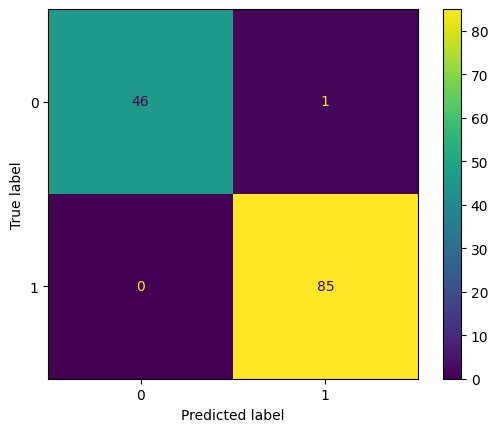

In [7]:
test(X_test_kidney, y_test_kidney, forest_model_kidney)

#### 3. Adaboost

In [8]:
ada_model_kidney,_ = train(X_train_kidney, y_train_kidney, cv, 'adaboost')

Hyperparams Adaboost to tune:
{'n_estimators': [10, 50, 100], 'learning_rate': [0.1, 1.0, 10]}
----------------------------------------
Best params for Adaboost:  {'learning_rate': 1.0, 'n_estimators': 50}
----------------------------------------
Mean cross-validated score:  0.9886039886039886
#---Processing Time---#
14.717064142227173 seconds


#---Classification Report---#
              precision    recall  f1-score   support

    Negative       1.00      0.98      0.99        47
    Positive       0.99      1.00      0.99        85

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132

#---Confusion Matrix---#


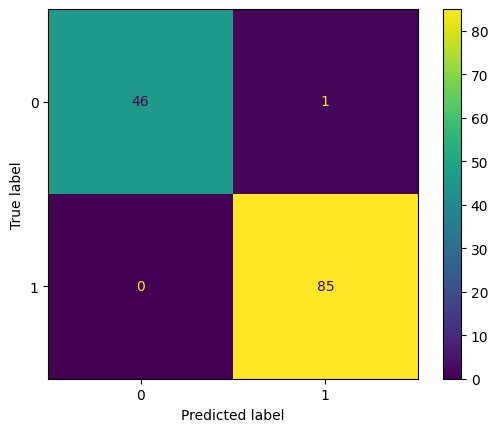

In [9]:
test(X_test_kidney, y_test_kidney, ada_model_kidney)

#### 4. Quadratic Discriminant Analysis (QDA)

In [10]:
qda_model_kidney,_ = train(X_train_kidney, y_train_kidney, cv, 'qda')

Hyperparams Quadratic Discriminant Analysis to tune:
{'reg_param': [0.0, 0.1, 0.5, 1.0], 'tol': [1e-05, 0.0001]}


----------------------------------------
Best params for Quadratic Discriminant Analysis:  {'reg_param': 0.0, 'tol': 1e-05}
----------------------------------------
Mean cross-validated score:  0.9737891737891738
#---Processing Time---#
0.162949800491333 seconds


#---Classification Report---#
              precision    recall  f1-score   support

    Negative       0.87      1.00      0.93        47
    Positive       1.00      0.92      0.96        85

    accuracy                           0.95       132
   macro avg       0.94      0.96      0.94       132
weighted avg       0.95      0.95      0.95       132

#---Confusion Matrix---#


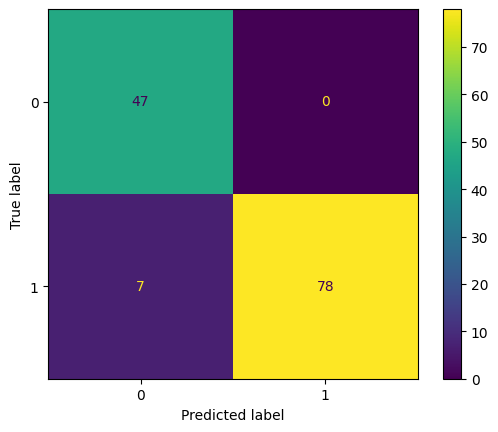

In [11]:
test(X_test_kidney, y_test_kidney, qda_model_kidney)

#### 5. Multi-layer Perceptron

In [12]:
mlp_model_kidney,_ = train(X_train_kidney, y_train_kidney, cv, 'mlp')

Hyperparams Multi-layer Perceptron to tune:
{'hidden_layer_sizes': [(50, 25), (100, 50), (200, 100), (300, 150)], 'activation': ['logistic', 'tanh'], 'beta_1': [0.9, 0.95, 0.99], 'beta_2': [0.9, 0.99, 0.999], 'early_stopping': [True]}


----------------------------------------
Best params for Multi-layer Perceptron:  {'activation': 'tanh', 'beta_1': 0.99, 'beta_2': 0.99, 'early_stopping': True, 'hidden_layer_sizes': (50, 25)}
----------------------------------------
Mean cross-validated score:  0.9700854700854702
#---Processing Time---#
60.13557577133179 seconds


#---Classification Report---#
              precision    recall  f1-score   support

    Negative       0.98      0.85      0.91        47
    Positive       0.92      0.99      0.95        85

    accuracy                           0.94       132
   macro avg       0.95      0.92      0.93       132
weighted avg       0.94      0.94      0.94       132

#---Confusion Matrix---#


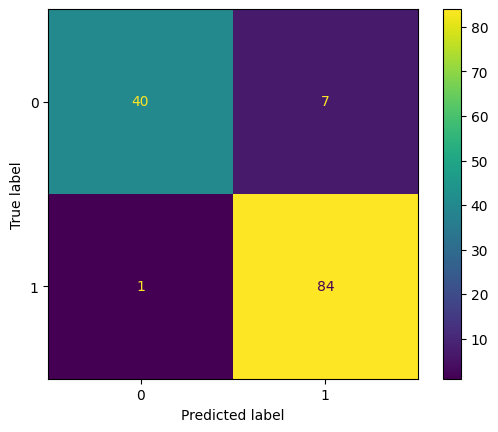

In [13]:
test(X_test_kidney, y_test_kidney, mlp_model_kidney)

#### 6. Kmeans algorithm

This code essentially applies K-means clustering to the dataset and evaluates how well the obtained clusters align with the actual binary target labels(y_train). The mode is used to map cluster labels to binary values.

In [14]:
#Maps cluster labels to binary values (0 or 1) using the most common value in each cluster (mode).
#Maps cluster labels to actual binary target labels.

kmeans_kindey,_ = train(X_train_kidney, y_train_kidney, cv, 'kmeans')

Hyperparams Kmeans to tune:
{'n_clusters': [2], 'algorithm': ['lloyd', 'elkan']}
----------------------------------------
Best params for Kmeans:  {'algorithm': 'lloyd', 'n_clusters': 2}
----------------------------------------
Mean cross-validated score:  -17.644164761874745
#---Processing Time---#
0.2992994785308838 seconds


#---Classification Report---#
              precision    recall  f1-score   support

    Negative       0.61      1.00      0.76        47
    Positive       1.00      0.65      0.79        85

    accuracy                           0.77       132
   macro avg       0.81      0.82      0.77       132
weighted avg       0.86      0.77      0.78       132

#---Confusion Matrix---#


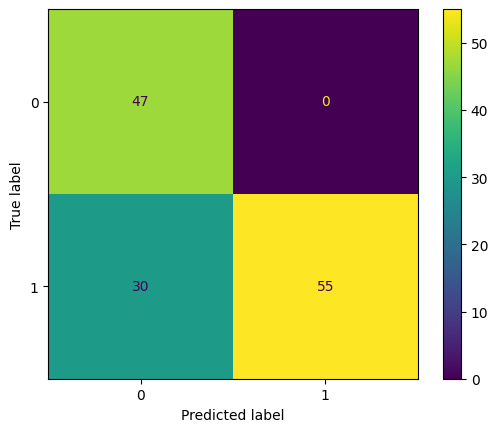

In [15]:
test(X_test_kidney, y_test_kidney, kmeans_kindey)

# B. Banknote Dataset <a id="B-banknote-dataset"></a>

### I. Preprocessing

Total samples: 1372
Number of Positive labels: 610
Number of Negative labels: 762
Number of missing numeric values: 0 (4 columns)
----------------------------------------
Missing values in variance: 0/1372
Missing values in skewness: 0/1372
Missing values in curtosis: 0/1372
Missing values in entropy: 0/1372
----------------------------------------


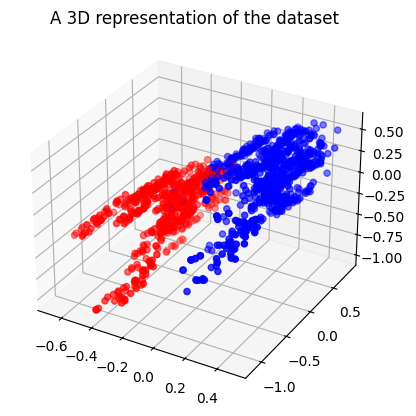

In [16]:
X_banknote, y_banknote = preprocessing("banknote", PCA_dims=3)

### II. Data Loader

In [17]:
X_train_banknote, X_test_banknote, y_train_banknote, y_test_banknote, cv = prepare_data(X_banknote, y_banknote, test_size=0.4)

### III. Training models

#### 1. SVM

In [18]:
svm_model_banknote,_ = train(X_train_banknote, y_train_banknote, cv, 'svm')

Hyperparams SVM to tune:
{'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['poly', 'rbf']}
----------------------------------------
Best params for SVM:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
----------------------------------------
Mean cross-validated score:  0.9574640023508669
#---Processing Time---#
1.9333057403564453 seconds


#---Classification Report---#
              precision    recall  f1-score   support

    Negative       0.99      0.95      0.97       310
    Positive       0.93      0.98      0.96       239

    accuracy                           0.96       549
   macro avg       0.96      0.96      0.96       549
weighted avg       0.96      0.96      0.96       549

#---Confusion Matrix---#


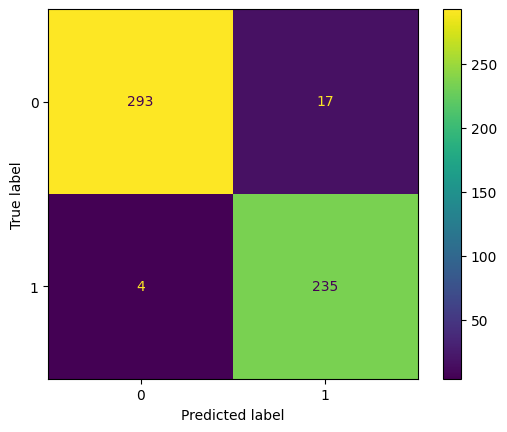

In [19]:
test(X_test_banknote, y_test_banknote, svm_model_banknote)

#### 2. Random Forest

In [20]:
forest_model_banknote,_ = train(X_train_banknote, y_train_banknote, cv, 'forest')

Hyperparams Random Forest to tune:
{'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [5, 10, 20, 50, 100], 'max_features': ['sqrt', 'log2']}
----------------------------------------
Best params for Random Forest:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
----------------------------------------
Mean cross-validated score:  0.9769468116367911
#---Processing Time---#
85.42979907989502 seconds


#---Classification Report---#
              precision    recall  f1-score   support

    Negative       0.97      0.98      0.97       310
    Positive       0.98      0.95      0.97       239

    accuracy                           0.97       549
   macro avg       0.97      0.97      0.97       549
weighted avg       0.97      0.97      0.97       549

#---Confusion Matrix---#


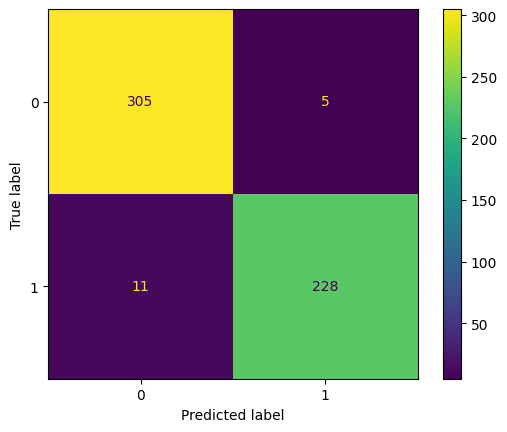

In [21]:
test(X_test_banknote, y_test_banknote, forest_model_banknote)

#### 3. Adaboost

In [22]:
ada_model_banknote,_ = train(X_train_banknote, y_train_banknote, cv, 'adaboost')

Hyperparams Adaboost to tune:
{'n_estimators': [10, 50, 100], 'learning_rate': [0.1, 1.0, 10]}


----------------------------------------
Best params for Adaboost:  {'learning_rate': 1.0, 'n_estimators': 100}
----------------------------------------
Mean cross-validated score:  0.9720540699382896
#---Processing Time---#
11.062040090560913 seconds


#---Classification Report---#
              precision    recall  f1-score   support

    Negative       0.97      0.99      0.98       310
    Positive       0.98      0.96      0.97       239

    accuracy                           0.98       549
   macro avg       0.98      0.97      0.98       549
weighted avg       0.98      0.98      0.98       549

#---Confusion Matrix---#


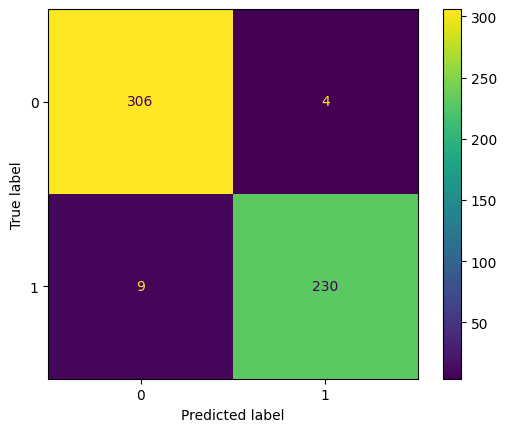

In [23]:
test(X_test_banknote, y_test_banknote, ada_model_banknote)

#### 4. Quadratic Discriminant Analysis (QDA)

In [24]:
qda_model_banknote,_ = train(X_train_banknote, y_train_banknote, cv, 'qda')

Hyperparams Quadratic Discriminant Analysis to tune:
{'reg_param': [0.0, 0.1, 0.5, 1.0], 'tol': [1e-05, 0.0001]}
----------------------------------------
Best params for Quadratic Discriminant Analysis:  {'reg_param': 0.0, 'tol': 1e-05}
----------------------------------------
Mean cross-validated score:  0.9405083749632677
#---Processing Time---#
0.14175629615783691 seconds


#---Classification Report---#
              precision    recall  f1-score   support

    Negative       1.00      0.93      0.96       310
    Positive       0.92      1.00      0.95       239

    accuracy                           0.96       549
   macro avg       0.96      0.96      0.96       549
weighted avg       0.96      0.96      0.96       549

#---Confusion Matrix---#


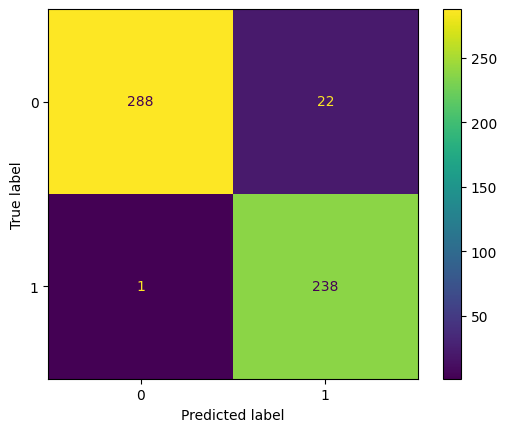

In [25]:
test(X_test_banknote, y_test_banknote, qda_model_banknote)

#### 5. Multi-layer Perceptron

In [26]:
mlp_model_banknote,_ = train(X_train_banknote, y_train_banknote, cv, 'mlp')

Hyperparams Multi-layer Perceptron to tune:
{'hidden_layer_sizes': [(50, 25), (100, 50), (200, 100), (300, 150)], 'activation': ['logistic', 'tanh'], 'beta_1': [0.9, 0.95, 0.99], 'beta_2': [0.9, 0.99, 0.999], 'early_stopping': [True]}
----------------------------------------
Best params for Multi-layer Perceptron:  {'activation': 'tanh', 'beta_1': 0.9, 'beta_2': 0.9, 'early_stopping': True, 'hidden_layer_sizes': (300, 150)}
----------------------------------------
Mean cross-validated score:  0.9392594769321188
#---Processing Time---#
163.33618879318237 seconds


#---Classification Report---#
              precision    recall  f1-score   support

    Negative       0.90      0.94      0.92       310
    Positive       0.92      0.87      0.89       239

    accuracy                           0.91       549
   macro avg       0.91      0.90      0.91       549
weighted avg       0.91      0.91      0.91       549

#---Confusion Matrix---#


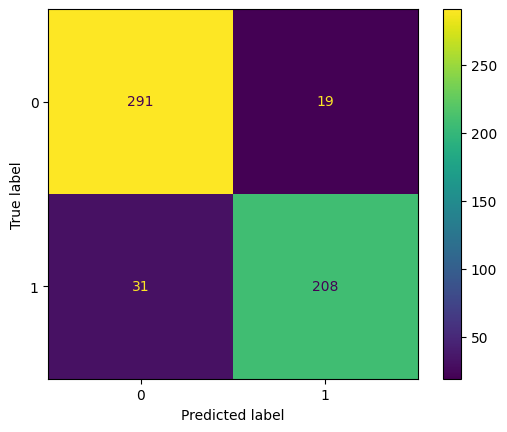

In [27]:
test(X_test_banknote, y_test_banknote, mlp_model_banknote)

#### 6. Kmeans algorithm

In [28]:
#Maps cluster labels to binary values (0 or 1) using the most common value in each cluster (mode).
#Maps cluster labels to actual binary target labels.

kmeans_banknote,_ = train(X_train_banknote, y_train_banknote, cv, 'kmeans')

Hyperparams Kmeans to tune:
{'n_clusters': [2], 'algorithm': ['lloyd', 'elkan']}
----------------------------------------
Best params for Kmeans:  {'algorithm': 'lloyd', 'n_clusters': 2}
----------------------------------------
Mean cross-validated score:  -10.317177068269185
#---Processing Time---#
0.10663819313049316 seconds


#---Classification Report---#
              precision    recall  f1-score   support

    Negative       0.88      0.86      0.87       310
    Positive       0.82      0.85      0.83       239

    accuracy                           0.85       549
   macro avg       0.85      0.85      0.85       549
weighted avg       0.85      0.85      0.85       549

#---Confusion Matrix---#


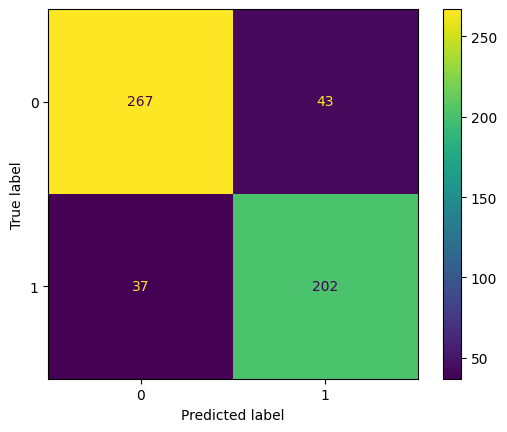

In [29]:
test(X_test_banknote, y_test_banknote, kmeans_banknote)

## C. Discussion <a id="C-discussion"></a>

_Table of Contents_
1) comments for each classification method
2) comments on the adaptability of the classification method to the dataset

#### 1. comments for each classification method

_Every comment on the accuracy, termination time, ... will only be valid for our datasets._

**SVM**

Performed well overall. Although not the fastest algorithm, it takes only about 1 second to train (choose the right parameters + fit). Makes little second-kind errors, and it tends to make first-kind errors for our datasets, which is better (better to say that you have kidney disease whereas you have not than not saying it whereas you have it).

**Random Forest**

Tend to have great accuracy overall. However, it takes a lot of time to train (more than 1 minute). Not the best algorithm in terms of accuracy, and one of the worst in terms of time.

**Adaboost**

Tend to have better results than random forest and is way faster than it (about 8 seconds compared to > 1 minute).

**QDA**

The fastest algorithm to terminate (train phase). Is constant in the almost perfect results. Tend to make only first-kind errors or only second-kind errors.

**MLP**

The slowest algorithm. Shows great results for non-modified data, but somehow has a low compatibility with the PCA transformation of the data.

**KMeans**

Globally the worst algorithm in terms of accuracy. The role of KMeans here was just to test how much were the observations separable. However, we could see that KMeans is a lot better when using PCA transformation. We suppose that it is because PCA yields better clusters of similar data.

#### 2. comments on the adaptability of the classification method to the dataset

**The Kidney dataset**

For this dataset, SVM performed well concerning both accuracy and time; no errors and fast to train. It overwhelmed all the other estimators. The second best for this dataset is the pair random forest - Adaboost. However, Adaboost is way faster to train than random forest. QDA has a correct accuracy, but not excellent. The MLP has a big problem with PCA since it tends to have a lot more errors when we keep about 17 dimensions over 34.

**The Banknote dataset**

Adapted estimators for this dataset are more divided. Accuracy-wise we would pick Adaboost. But if we want a good time-accuracy balance, we could pick SVM. We also observe that KMeans do great on this dataset (for KMeans standard in this project) if we use PCA.